Yohanes Egi Pratama Yudoutomo

In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
print('versi panda',pd.__version__)
print('versi numpy',np.__version__)
print('versi seaborn',sns.__version__)

versi panda 1.1.5
versi numpy 1.19.4
versi seaborn 0.11.0


In [13]:
data = pd.read_csv('drive/MyDrive/amazons.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [15]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


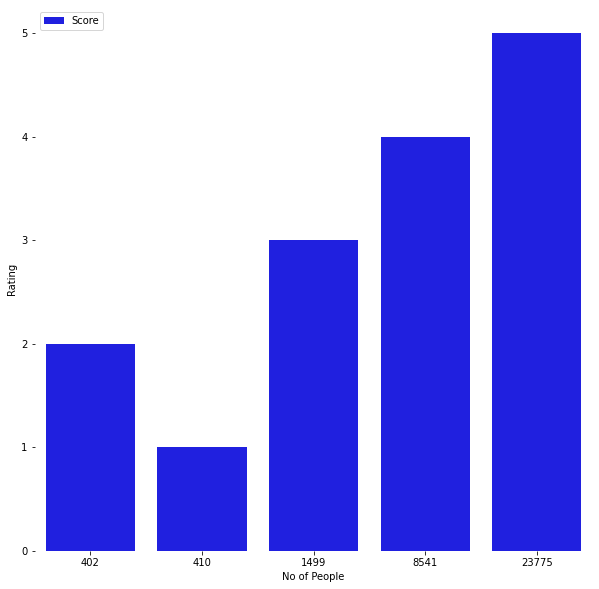

In [21]:
import seaborn as sns 

f, ax = plt.subplots(figsize=(10, 10)) 
sns.set_color_codes("pastel") 
sns.barplot(y="reviews.rating", x="No of Users", data=review.iloc[:20, :10],label="Score", color="blue")

ax.legend(ncol=2, loc="upper left", frameon=True) 
ax.set(xlabel="No of People",ylabel="Rating") 
sns.despine(left=True, bottom=True) 
plt.show()

In [22]:
permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [23]:
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username


In [25]:
actualrating = mpermanent[(mpermanent['reviews.rating']== 1)| (mpermanent['reviews.rating'] == 5)]
actualrating.shape

(24178, 4)

In [26]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()

In [27]:
X = x['reviews.text']

In [28]:
print(X)

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I bought this for my grand daughter when she c...
4        This amazon fire 8 inch tablet is the perfect ...
                               ...                        
24173    This is exactly like any other usb power charg...
24174    Amazon should include this charger with the Ki...
24175    Love my Kindle Fire but I am really disappoint...
24176    I was surprised to find it did not come with a...
24177    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 24178, dtype: object


In [38]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [39]:
tokens = X[0].split()
print(tokens)

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.']


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
# import re
# from autocorrect import spell
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [48]:
len(bow_transformer.vocabulary_)

16954

In [49]:
review_24 = X[24]

In [50]:
bow_25 = bow_transformer.transform([review_24])
bow_25

<1x16954 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [51]:
print(bow_25)

  (0, 1816)	1
  (0, 2476)	1
  (0, 5664)	1
  (0, 7835)	1
  (0, 10671)	1
  (0, 10778)	1
  (0, 11499)	1
  (0, 11691)	1
  (0, 11940)	1
  (0, 14868)	1
  (0, 15195)	1
  (0, 15507)	1
  (0, 16158)	1
  (0, 16540)	1


In [52]:
X = bow_transformer.transform(X)

In [53]:
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
preds = nb.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print('hasil prediksi')
nb.score(X_train, y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.20      0.11      0.14       117
         5.0       0.99      0.99      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.59      0.55      0.57      7254
weighted avg       0.97      0.98      0.98      7254

hasil prediksi


0.9839872370597967